In [1]:
# import the needed modules
import os
from matplotlib.pyplot import imshow
import scipy.io
import scipy.misc
import numpy as np
from PIL import Image

from keras import backend as K
from keras.models import load_model

# The below provided fucntions will be used from yolo_utils.py
from yolo_utils import read_classes, read_anchors, generate_colors, preprocess_image, draw_boxes

# The below functions from the yad2k library will be used
from yad2k.models.keras_yolo import yolo_head, yolo_eval

C:\Users\USER\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
#Loading the classes and the anchor boxes that are provided in the madel_data folder
class_names = read_classes("model_data/coco_classes.txt")
anchors = read_anchors("model_data/yolo_anchors.txt")

#Load the pretrained model. Please refer the README file to get info on how to obtain the yolo.h5 file
yolo_model = load_model("model_data/yolo.h5")

C:\Users\USER\Anaconda3\lib\site-packages\keras\engine\saving.py:292: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '


In [3]:
#Print the summery of the model
yolo_model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 608, 608, 3)  0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 608, 608, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, 608, 608, 32) 128         conv2d_1[0][0]                   
__________________________________________________________________________________________________
leaky_re_lu_1 (LeakyReLU)       (None, 608, 608, 32) 0           batch_normalization_1[0][0]      
__________________________________________________________________________________________________
max_poolin

In [6]:
#Provide the name of the image that you saved in the images folder to be fed through the network
input_image_name = "test20.jpg"


#Obtaining the dimensions of the input image
from PIL import Image
input_image = Image.open("images/" + input_image_name)
width, height = input_image.size
width = np.array(width, dtype=float)
height = np.array(height, dtype=float)

#Assign the shape of the input image to image_shapr variable
image_shape = (height, width)

print(image_shape)

from IPython.display import Image
Image(url= "images/" + input_image_name)

(array(276.), array(183.))


Found 4 boxes for test20.jpg
car 0.62 (0, 54) (25, 79)
car 0.67 (20, 58) (47, 79)
person 0.73 (77, 46) (141, 179)
horse 0.89 (38, 78) (162, 259)


C:\Users\USER\Anaconda3\lib\site-packages\ipykernel_launcher.py:26: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.


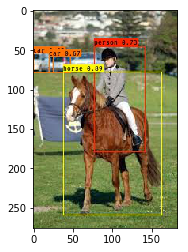

In [7]:
#Convert final layer features to bounding box parameters
yolo_outputs = yolo_head(yolo_model.output, anchors, len(class_names))

#Now yolo_eval function selects the best boxes using filtering and non-max suppression techniques.
# If you want to dive in more to see how this works, refer keras_yolo.py file in yad2k/models
boxes, scores, classes = yolo_eval(yolo_outputs, image_shape)

# Initiate a session
sess = K.get_session()

#Preprocess the input image before feeding into the convolutional network
image, image_data = preprocess_image("images/" + input_image_name, model_image_size = (608, 608))

#Run the session
out_scores, out_boxes, out_classes = sess.run([scores, boxes, classes],feed_dict={yolo_model.input:image_data,K.learning_phase(): 0})


#Print the results
print('Found {} boxes for {}'.format(len(out_boxes), input_image_name))
#Produce the colors for the bounding boxs
colors = generate_colors(class_names)
#Draw the bounding boxes
draw_boxes(image, out_scores, out_boxes, out_classes, class_names, colors)
#Apply the predicted bounding boxes to the image and save it
image.save(os.path.join("out", input_image_name), quality=90)
output_image = scipy.misc.imread(os.path.join("out", input_image_name))
imshow(output_image)
